In [12]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

In [26]:
X = pd.read_csv('C:/Users/ASUS/Desktop/p/CB ML/convolution-neural-network-tutorial/Dataset/fashion-mnist.csv')

In [27]:
print(X.shape)

(10000, 785)


In [28]:
X = X.values
x = X[:,1:]
y = X[:,0]
print(x.shape,y.shape)
print(np.unique(y,return_counts=True))

(10000, 784) (10000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


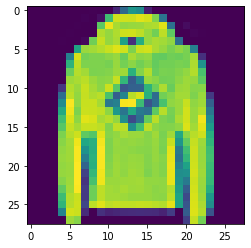

In [29]:
plt.imshow(x[1000].reshape(28,28))

In [30]:
x = x.reshape((-1,28,28,1))/255
print(x)

[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.01568627]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.00392157]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0. 

In [31]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes=10)
print(x.shape,y.shape)


(10000, 28, 28, 1) (10000, 10)


In [32]:
print(y[2])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
## Cnn model


model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu')) # 5x5
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(20,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        


W0721 15:22:02.835831  5140 deprecation_wrapper.py:119] From c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 15:22:03.252918  5140 deprecation_wrapper.py:119] From c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 15:22:03.343462  5140 deprecation_wrapper.py:119] From c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 15:22:03.432610  5140 deprecation_wrapper.py:119] From c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Pleas

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 20)          23060     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total para

In [35]:

model.fit(x,y,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)

W0721 15:29:20.376987  5140 deprecation.py:323] From c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 15:29:20.453777  5140 deprecation_wrapper.py:119] From c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 18s 2ms/step - loss: 1.3155 - acc: 0.5545 - val_loss: 0.8127 - val_acc: 0.6780
Epoch 2/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.7385 - acc: 0.7201 - val_loss: 0.6239 - val_acc: 0.7680
Epoch 3/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.5839 - acc: 0.7818 - val_loss: 0.5378 - val_acc: 0.8060
Epoch 4/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.5201 - acc: 0.8047 - val_loss: 0.4842 - val_acc: 0.8185
Epoch 5/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.4733 - acc: 0.8264 - val_loss: 0.4679 - val_acc: 0.8290
Epoch 6/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.4530 - acc: 0.8346 - val_loss: 0.4226 - val_acc: 0.8525
Epoch 7/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.4102 - acc: 0.8479 - val_loss: 0.4277 - val_acc: 0.8510
Epoch 8

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(1148, 1000)


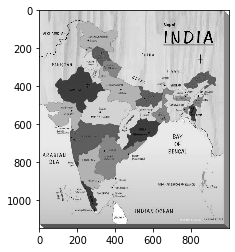

In [86]:
# edge detection
img = cv2.imread('C:/Users/ASUS/Desktop/indai.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


plt.imshow(img,cmap='gray')
print(img.shape)


In [87]:
e_filter = np.array([[1,0,-1],
                     [1,0,-1],
                     [1,0,-1] ])
print(e_filter.shape)

(3, 3)


In [88]:
img_w = img.shape[0]
img_h = img.shape[1]
e_img_w = img_w - 3 + 1
e_img_h = img_h - 3 + 1
e_img = np.zeros((e_img_w,e_img_h))
for r in range(e_img_w):
    for c in range(e_img_h):
        for i in range(3):
            for j in range(3):
                e_img[r][c] += img[r+i][c+j]*e_filter[i][j]
                
            if e_img[r][c]>255:
                e_img[r][c] = 255
                
            elif e_img[r][c]<0:
                e_img[r][c] = 0
                

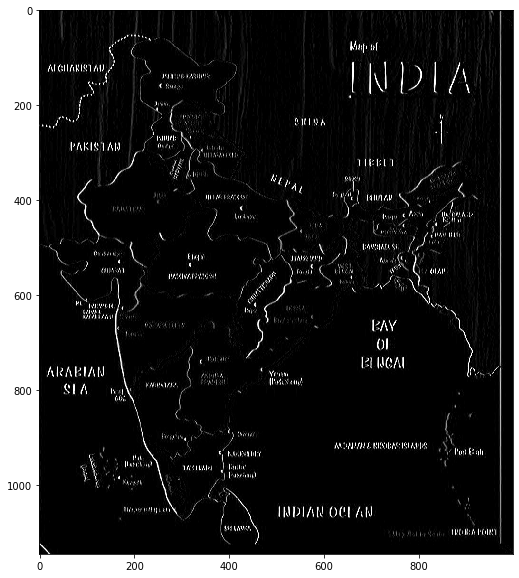

In [89]:
plt.figure(figsize=(10,10))
plt.imshow(e_img,cmap='gray')


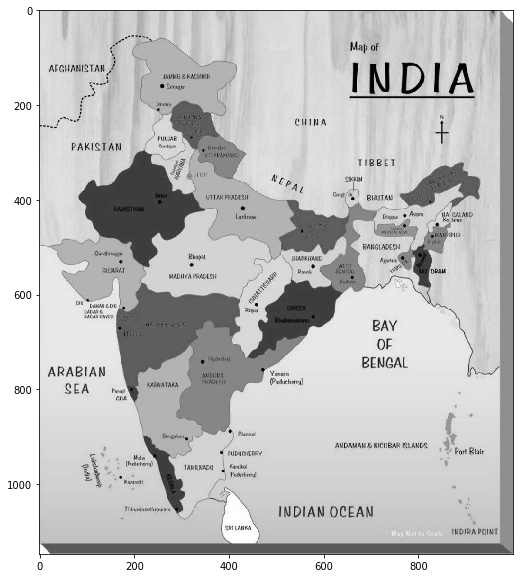

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')